In [1]:
import numpy as np
import bayesflow as beef
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../assets")
from models import RandomWalkDDM, MixtureRandomWalkDDM, LevyFlightDDM, RegimeSwitchingDDM

/Users/lukas/opt/miniconda3/envs/beef/lib/python3.11/site-packages/bayesflow/trainers.py:27: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
LOCAL_PARAM_LABELS = ['Drift rate', 'Threshold', 'Non-decision time']
LOCAL_PARAM_NAMES  = [r'v', r'a', r'\tau']
HYPER_PARAM_LABELS = ['Transition std. deviation', 'Switch Probability', 'Alpha', 'Length scale']
HYPER_PARAM_NAMES  = [r'\sigma', r'q', r'\alpha', r'l']

FONT_SIZE_1 = 18

# Random Walk DDM

In [3]:
model = RandomWalkDDM()

INFO:root:Performing 2 pilot runs with the random_walk_ddm model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 800, 3)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 800)
INFO:root:Shape of hyper_prior_draws batch after 2 pilot simulations: (batch_size = 2, 3)
INFO:root:Shape of local_prior_draws batch after 2 pilot simulations: (batch_size = 2, 800, 3)
INFO:root:No shared_prior_draws provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional prior non-batchable context provided.


In [4]:
sim_data = model.generate(1000)

## Hyper Parameters

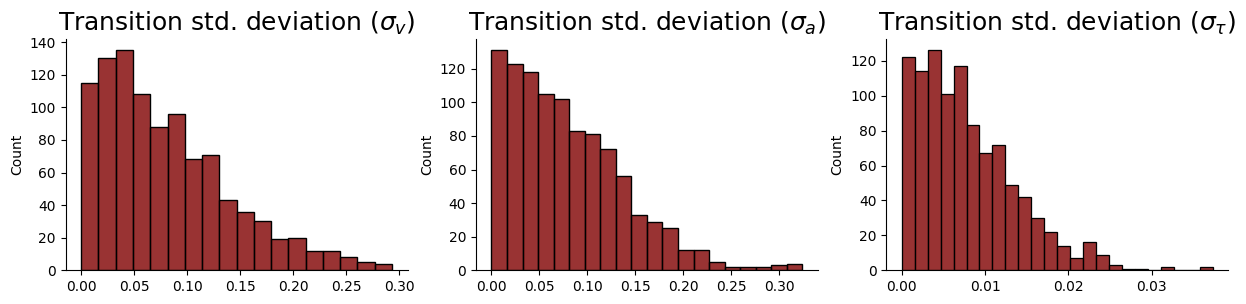

In [5]:
f, axarr = plt.subplots(1, 3, figsize=(15, 3))
for i, ax in enumerate(axarr.flat):
    sns.histplot(sim_data["hyper_prior_draws"][:, i], ax=ax, fill=True, alpha=0.8, color='maroon')
    ax.set_title(f'{HYPER_PARAM_LABELS[0]} (${HYPER_PARAM_NAMES[0]}_{LOCAL_PARAM_NAMES[i]}$)', fontsize=FONT_SIZE_1)
    sns.despine()

## Local Parameters

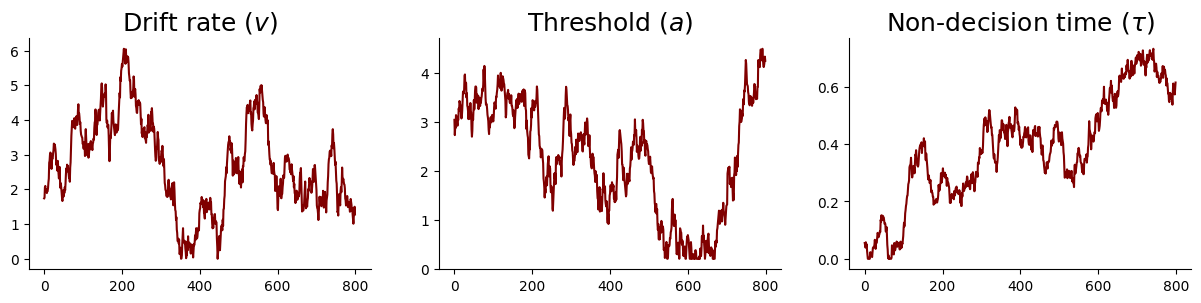

In [6]:
which = 0
time = np.arange(sim_data['local_prior_draws'].shape[1])
f, axarr = plt.subplots(1, 3, figsize=(15, 3))
for i, ax in enumerate(axarr.flat):
    ax.plot(time, sim_data['local_prior_draws'][which, :, i], color='maroon')
    ax.set_title(f'{LOCAL_PARAM_LABELS[i]} (${LOCAL_PARAM_NAMES[i]}$)', fontsize=FONT_SIZE_1)
    sns.despine()

## Prior Push Forward

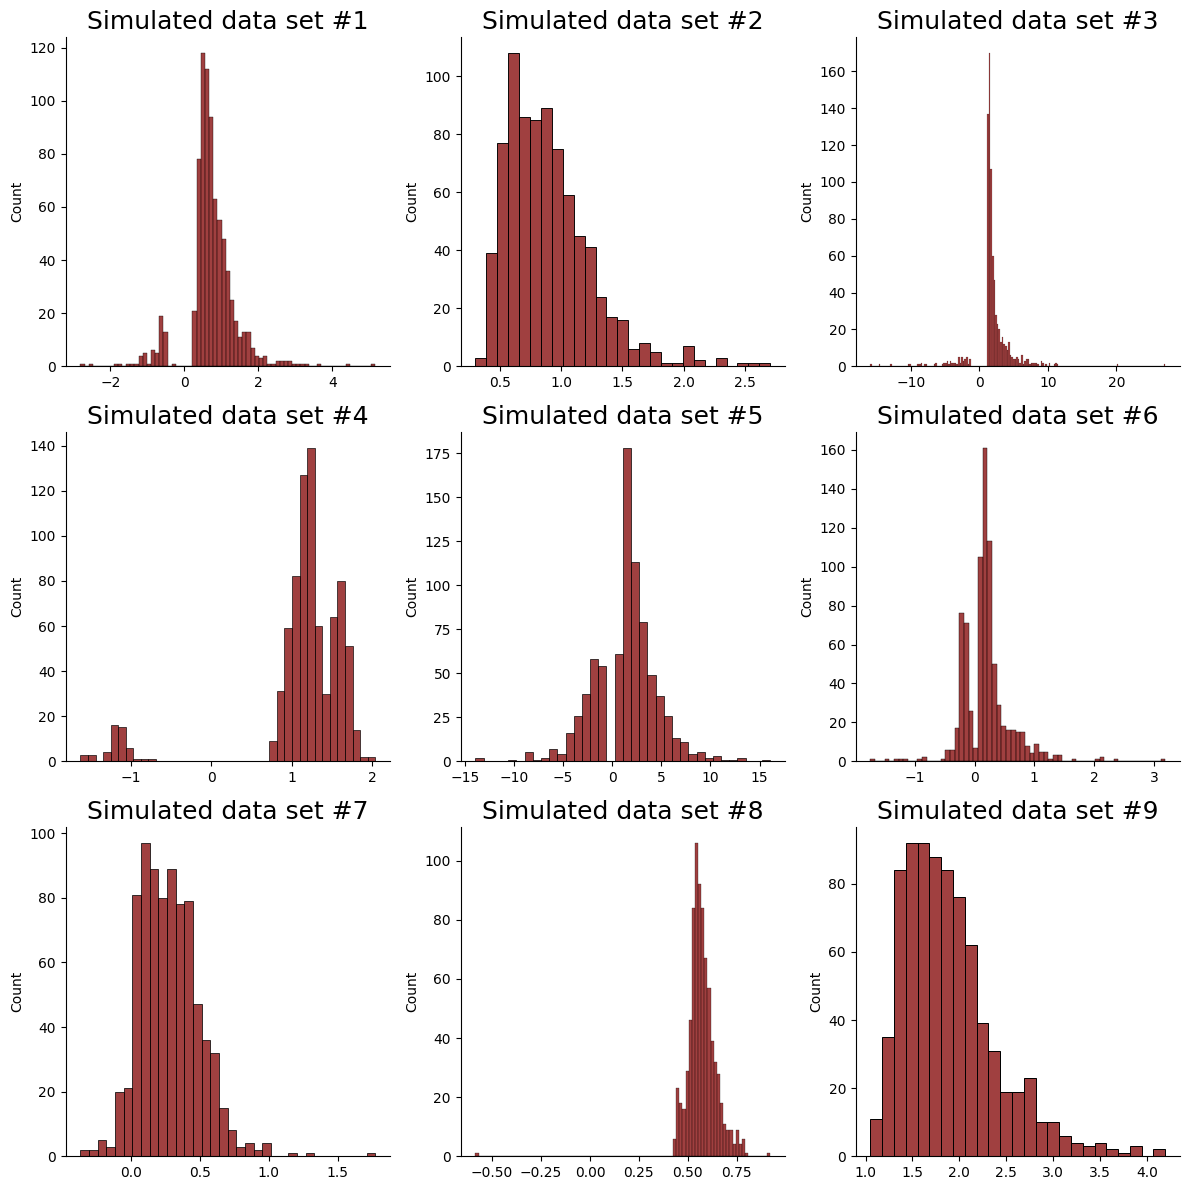

In [7]:
f, axarr = plt.subplots(3, 3, figsize=(12, 12))
for i, ax in enumerate(axarr.flat):
    sns.histplot(sim_data['sim_data'][i], ax=ax, color='maroon')
    ax.set_title(f'Simulated data set #{i+1}', fontsize=FONT_SIZE_1)
    sns.despine()
f.tight_layout()

# Mixture Random Walk DDM

In [8]:
model = MixtureRandomWalkDDM()

INFO:root:Performing 2 pilot runs with the mixture_random_walk_ddm model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 800, 3)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 800)
INFO:root:Shape of hyper_prior_draws batch after 2 pilot simulations: (batch_size = 2, 5)
INFO:root:Shape of local_prior_draws batch after 2 pilot simulations: (batch_size = 2, 800, 3)
INFO:root:No shared_prior_draws provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional prior non-batchable context provided.


In [9]:
sim_data = model.generate(1000)

## Hyper Parameters

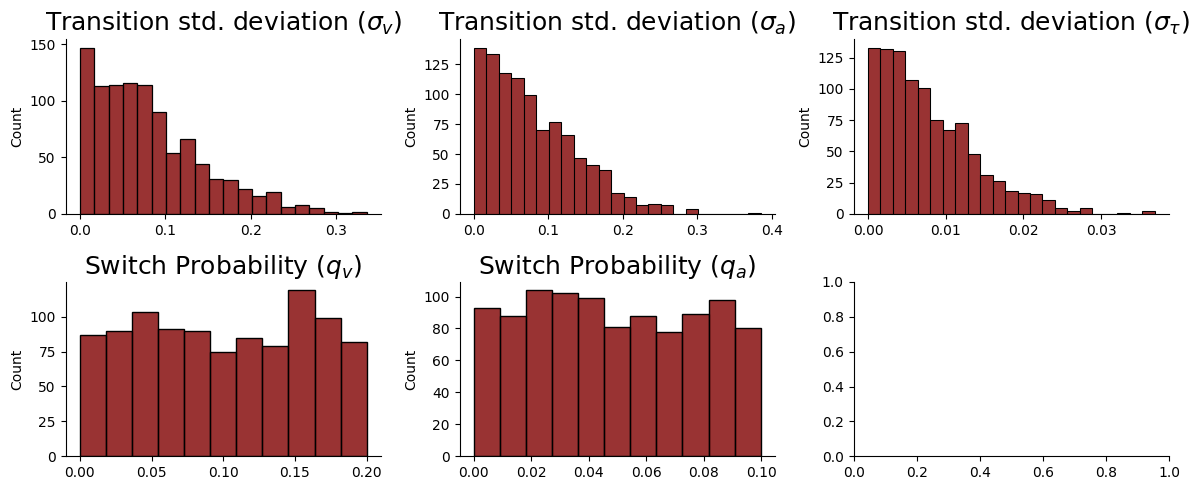

In [10]:
f, axarr = plt.subplots(2, 3, figsize=(12, 5))
for i, ax in enumerate(axarr.flat):
    sns.histplot(sim_data["hyper_prior_draws"][:, i], ax=ax, fill=True, alpha=0.8, color='maroon')
    if i < 3:
        ax.set_title(f'{HYPER_PARAM_LABELS[0]} (${HYPER_PARAM_NAMES[0]}_{LOCAL_PARAM_NAMES[i]}$)', fontsize=FONT_SIZE_1)
    else:
        ax.set_title(f'{HYPER_PARAM_LABELS[1]} (${HYPER_PARAM_NAMES[1]}_{LOCAL_PARAM_NAMES[i-3]}$)', fontsize=FONT_SIZE_1)
    sns.despine()
    if i == 4:
        f.tight_layout()
        break

## Local Parameters

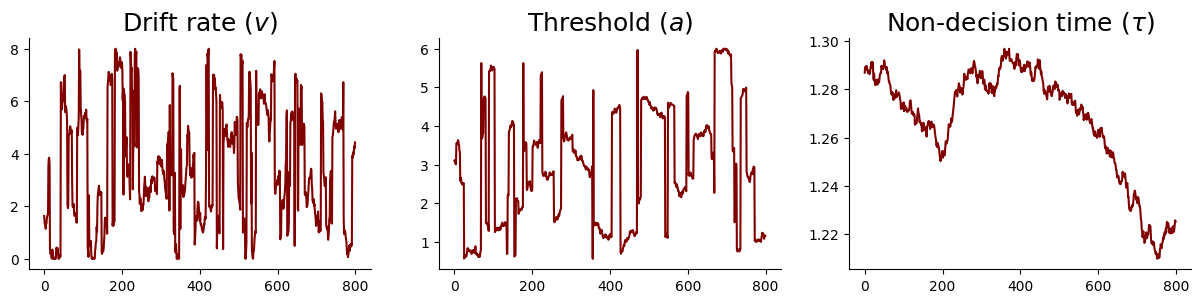

In [11]:
which = 0
time = np.arange(sim_data['local_prior_draws'].shape[1])
f, axarr = plt.subplots(1, 3, figsize=(15, 3))
for i, ax in enumerate(axarr.flat):
    ax.plot(time, sim_data['local_prior_draws'][which, :, i], color='maroon')
    ax.set_title(f'{LOCAL_PARAM_LABELS[i]} (${LOCAL_PARAM_NAMES[i]}$)', fontsize=FONT_SIZE_1)
    sns.despine()

## Prior Push Forward

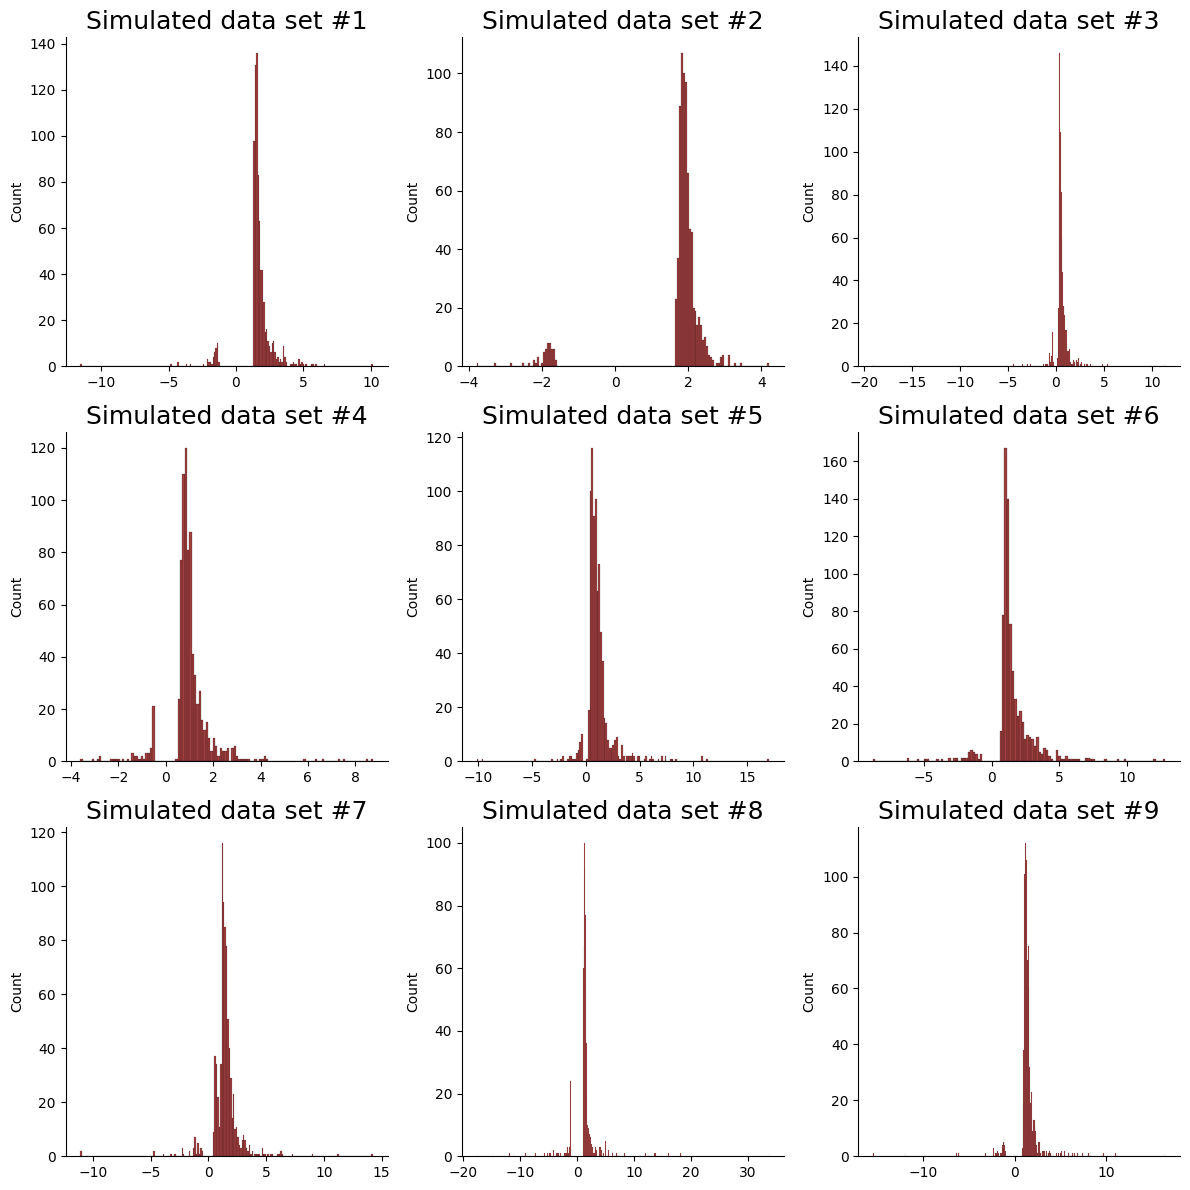

In [12]:
f, axarr = plt.subplots(3, 3, figsize=(12, 12))
for i, ax in enumerate(axarr.flat):
    sns.histplot(sim_data['sim_data'][i], ax=ax, color='maroon')
    ax.set_title(f'Simulated data set #{i+1}', fontsize=FONT_SIZE_1)
    sns.despine()
f.tight_layout()

# Levy Flight DDM

In [13]:
model = LevyFlightDDM()

INFO:root:Performing 2 pilot runs with the levy_flight_ddm model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 800, 3)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 800)
INFO:root:Shape of hyper_prior_draws batch after 2 pilot simulations: (batch_size = 2, 5)
INFO:root:Shape of local_prior_draws batch after 2 pilot simulations: (batch_size = 2, 800, 3)
INFO:root:No shared_prior_draws provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional prior non-batchable context provided.


In [14]:
sim_data = model.generate(1000)

## Hyper Parameter

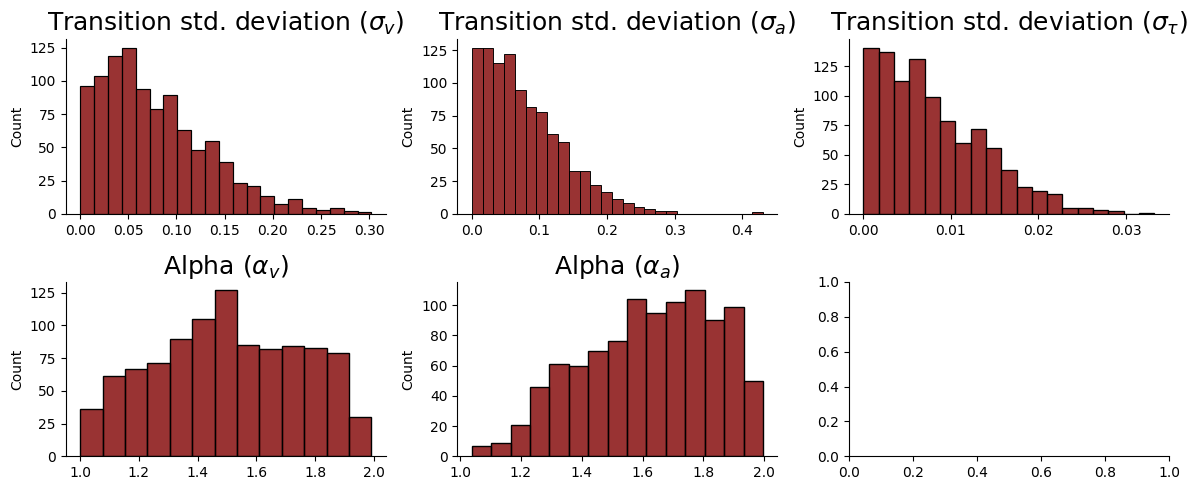

In [15]:
f, axarr = plt.subplots(2, 3, figsize=(12, 5))
for i, ax in enumerate(axarr.flat):
    sns.histplot(sim_data["hyper_prior_draws"][:, i], ax=ax, fill=True, alpha=0.8, color='maroon')
    if i < 3:
        ax.set_title(f'{HYPER_PARAM_LABELS[0]} (${HYPER_PARAM_NAMES[0]}_{LOCAL_PARAM_NAMES[i]}$)', fontsize=FONT_SIZE_1)
    else:
        ax.set_title(f'{HYPER_PARAM_LABELS[2]} (${HYPER_PARAM_NAMES[2]}_{LOCAL_PARAM_NAMES[i-3]}$)', fontsize=FONT_SIZE_1)
    sns.despine()
    if i == 4:
        f.tight_layout()
        break

## Local Parameter

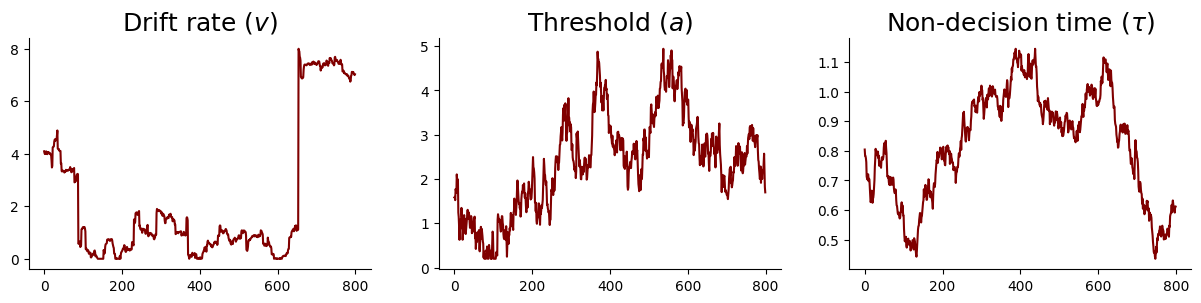

In [16]:
which = 0
time = np.arange(sim_data['local_prior_draws'].shape[1])
f, axarr = plt.subplots(1, 3, figsize=(15, 3))
for i, ax in enumerate(axarr.flat):
    ax.plot(time, sim_data['local_prior_draws'][which, :, i], color='maroon')
    ax.set_title(f'{LOCAL_PARAM_LABELS[i]} (${LOCAL_PARAM_NAMES[i]}$)', fontsize=FONT_SIZE_1)
    sns.despine()

## Prior Push Forward

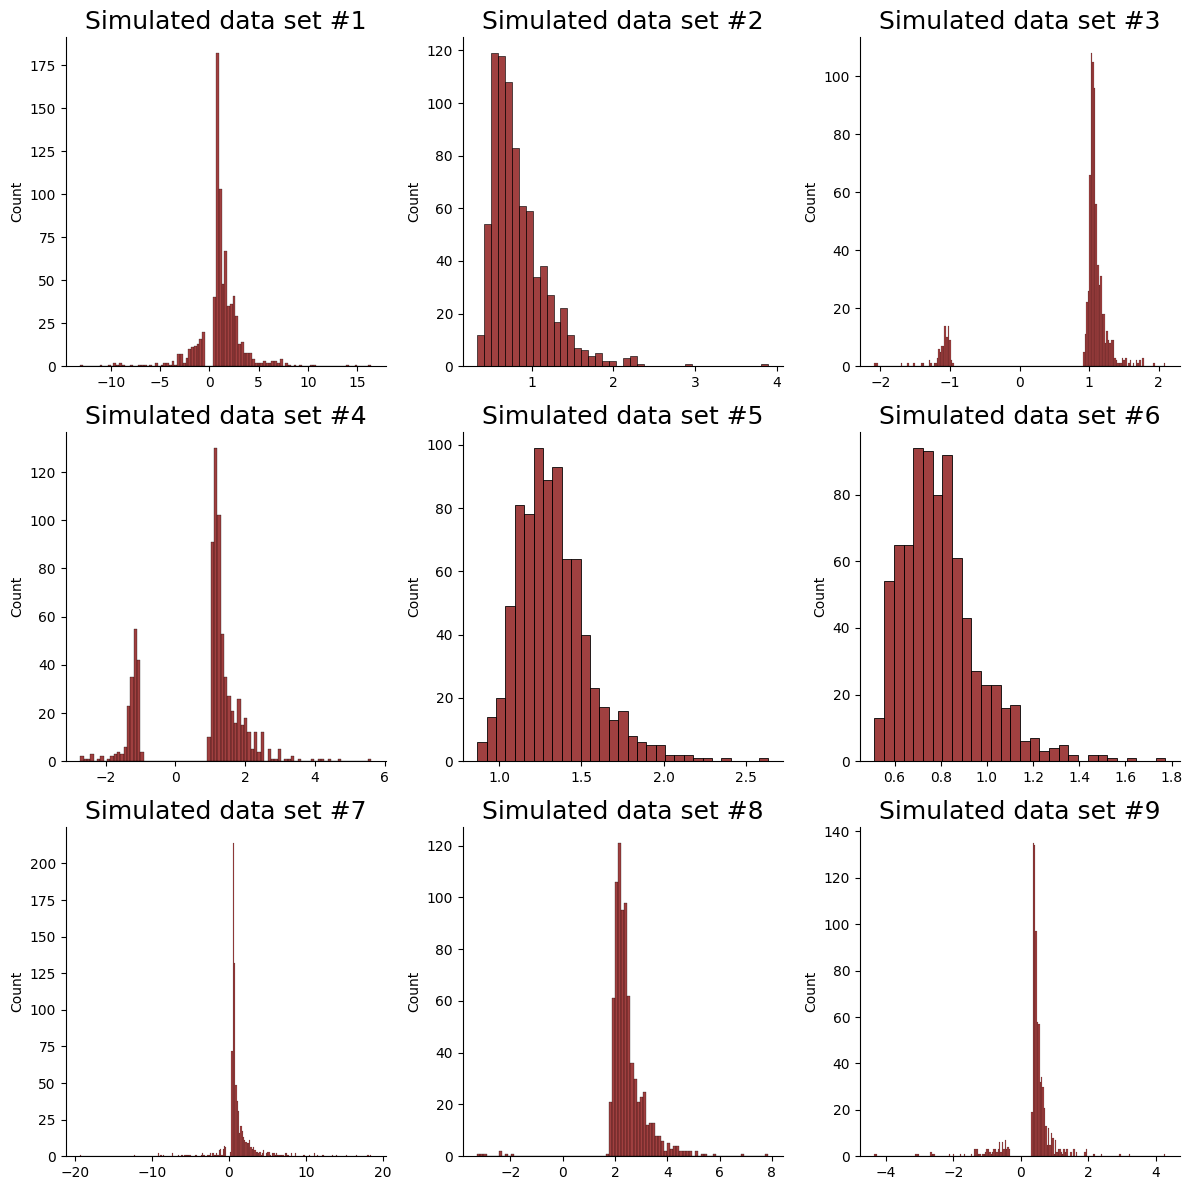

In [17]:
f, axarr = plt.subplots(3, 3, figsize=(12, 12))
for i, ax in enumerate(axarr.flat):
    sns.histplot(sim_data['sim_data'][i], ax=ax, color='maroon')
    ax.set_title(f'Simulated data set #{i+1}', fontsize=FONT_SIZE_1)
    sns.despine()
f.tight_layout()

# Regime Switching DDM

In [18]:
model = RegimeSwitchingDDM()

INFO:root:Performing 2 pilot runs with the regime_switching_ddm model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 800, 3)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 800)
INFO:root:Shape of hyper_prior_draws batch after 2 pilot simulations: (batch_size = 2, 3)
INFO:root:Shape of local_prior_draws batch after 2 pilot simulations: (batch_size = 2, 800, 3)
INFO:root:No shared_prior_draws provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional prior non-batchable context provided.


In [19]:
sim_data = model.generate(1000)

## Hyper Parameters

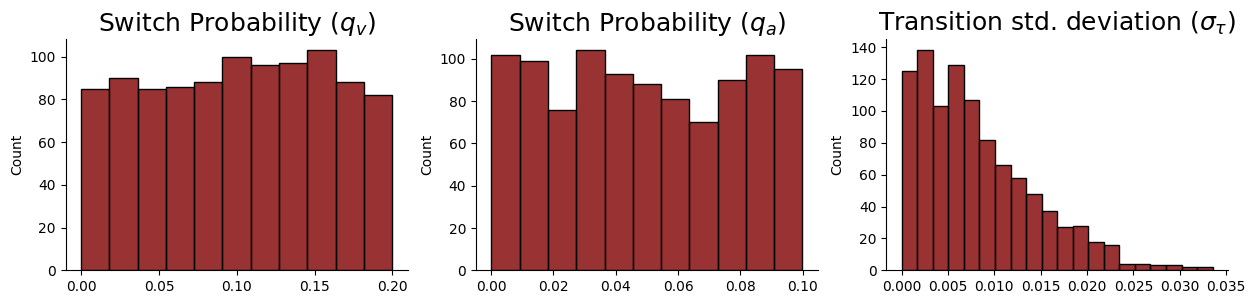

In [20]:
f, axarr = plt.subplots(1, 3, figsize=(15, 3))
for i, ax in enumerate(axarr.flat):
    sns.histplot(sim_data["hyper_prior_draws"][:, i], ax=ax, fill=True, alpha=0.8, color='maroon')
    if i < 2:
        ax.set_title(f'{HYPER_PARAM_LABELS[1]} (${HYPER_PARAM_NAMES[1]}_{LOCAL_PARAM_NAMES[i]}$)', fontsize=FONT_SIZE_1)
    else:
        ax.set_title(f'{HYPER_PARAM_LABELS[0]} (${HYPER_PARAM_NAMES[0]}_{LOCAL_PARAM_NAMES[i]}$)', fontsize=FONT_SIZE_1)
    sns.despine()

## Local Parameters

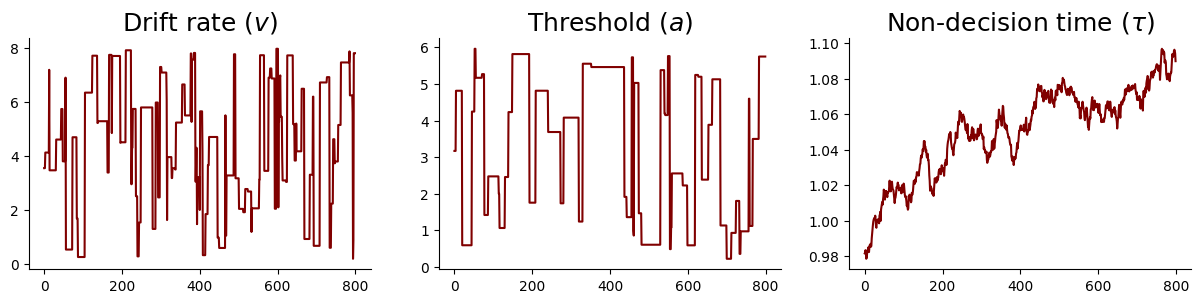

In [42]:
which = 0
time = np.arange(sim_data['local_prior_draws'].shape[1])
f, axarr = plt.subplots(1, 3, figsize=(15, 3))
for i, ax in enumerate(axarr.flat):
    ax.plot(time, sim_data['local_prior_draws'][which, :, i], color='maroon')
    ax.set_title(f'{LOCAL_PARAM_LABELS[i]} (${LOCAL_PARAM_NAMES[i]}$)', fontsize=FONT_SIZE_1)
    sns.despine()

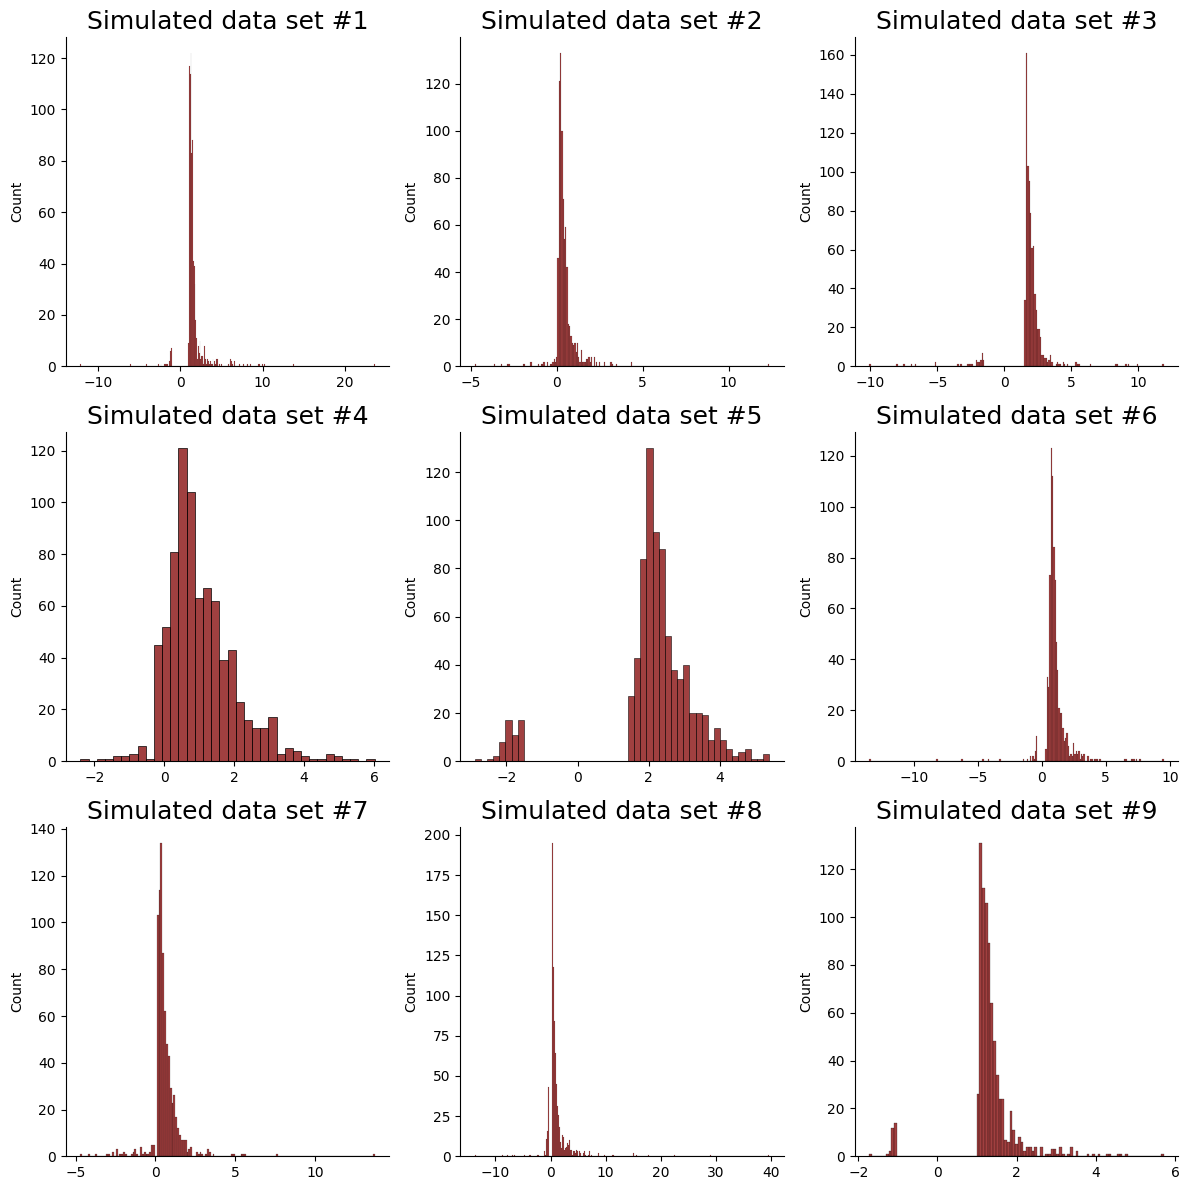

In [22]:
f, axarr = plt.subplots(3, 3, figsize=(12, 12))
for i, ax in enumerate(axarr.flat):
    sns.histplot(sim_data['sim_data'][i], ax=ax, color='maroon')
    ax.set_title(f'Simulated data set #{i+1}', fontsize=FONT_SIZE_1)
    sns.despine()
f.tight_layout()